In [82]:
%matplotlib inline
from mdt import *
cfg = yaml.load(open("mdt_config.yaml","r").read())

# Load TaskPapers

In [83]:
mp.P_T1 = r"^(.*):$"
mp.C_TITLE = ":"
auth_token = cfg['auth_token']
mp.import_from_dropbox(auth_token, "tmp")
dt = mp.parse_md_files("./tmp/"+"*.taskpaper")
del dt["T2"];del dt["T3"];del dt["ID"]

# Filter tasks only
df = dt[dt.TXT.str.contains("^\s*- ")]
dfs = ms.add_stat(df, "done,p")
dfs.rename(columns={"Filename": "Week", "T1": "Project", "done": "Date", "p":"Time"}, inplace=True)
valid_weeks = dfs.Week.unique().tolist() #valid_weeks.sort()

In [84]:
#dfs[(dfs.Week.isin(valid_weeks[-2:]))]

# Summary

## Daily Stats

In [85]:
daily = dfs.groupby(['Week',"Date"]).agg({'Time': ['sum'], 'TXT':'count', 'Project':'nunique'})
daily.columns = daily.columns.map(mu.flattenCols)
daily.rename(columns={"TXT_count": "Task_done"}, inplace=True)
daily['Ratio_Time'] = daily.Time_sum / 8
daily['Ratio_Task'] = daily.Task_done / 4
daily['Ratio_Project'] = daily.Project_nunique / 3
dstat = daily.fillna(0).sort_index(0, ascending=False).round(2)
dstat.to_csv("rpt/daily_stats.tsv",sep="\t")
dstat

Time_sum  Task_done  Project_nunique  Ratio_Time  \
Week     Date                                                           
20170205 2017-02-06       4.0          4                2        0.50   
20170129 2017-02-04       4.0          2                2        0.50   
         2017-02-03       0.0          1                1        0.00   
         2017-01-31       8.0          2                2        1.00   
         2017-01-30       0.0          1                1        0.00   
20170122 2017-01-27       4.0          1                1        0.50   
         2017-01-26       3.0          4                2        0.38   
         2017-01-25       0.0          5                2        0.00   
         2017-01-24       8.0          2                2        1.00   
         2017-01-23       4.0          1                1        0.50   
20170115 2017-01-21       2.0          2                2        0.25   
         2017-01-20       0.0          1                1        0.00   
         2017-01-19       4.0          1                1        0.50   
         2017-01-18       7.0          3                3        0.88   
         2017-01-17       4.0          2                2        0.50   
         2017-01-16       0.0          2                2        0.00   
20170108 2017-01-14       0.0          1                1        0.00   
         2017-01-13       0.0          2                2        0.00   
         2017-01-12       4.0          4                4        0.50   
         2017-01-11       5.0          2                2        0.62   
         2017-01-10       7.0          5                4        0.88   
         2017-01-09       0.0          2                2        0.00   
         2017-01-08       1.0          4                4        0.12   
20170101 2017-01-07       0.0          2                2        0.00   
         2017-01-06       0.0          2                2        0.00   
         2017-01-05       3.0          2                2        0.38   
         2017-01-04       0.0          3                2        0.00   
         2017-01-03       5.0          2                2        0.62   
         2017-01-02       8.0          3                3        1.00   

                     Ratio_Task  Ratio_Project  
Week     Date                                   
20170205 2017-02-06        1.00           0.67  
20170129 2017-02-04        0.50           0.67  
         2017-02-03        0.25           0.33  
         2017-01-31        0.50           0.67  
         2017-01-30        0.25           0.33  
20170122 2017-01-27        0.25           0.33  
         2017-01-26        1.00           0.67  
         2017-01-25        1.25           0.67  
         2017-01-24        0.50           0.67  
         2017-01-23        0.25           0.33  
20170115 2017-01-21        0.50           0.67  
         2017-01-20        0.25           0.33  
         2017-01-19        0.25           0.33  
         2017-01-18        0.75           1.00  
         2017-01-17        0.50           0.67  
         2017-01-16        0.50           0.67  
20170108 2017-01-14        0.25           0.33  
         2017-01-13        0.50           0.67  
         2017-01-12        1.00           1.33  
         2017-01-11        0.50           0.67  
         2017-01-10        1.25           1.33  
         2017-01-09        0.50           0.67  
         2017-01-08        1.00           1.33  
20170101 2017-01-07        0.50           0.67  
         2017-01-06        0.50           0.67  
         2017-01-05        0.50           0.67  
         2017-01-04        0.75           0.67  
         2017-01-03        0.50           0.67  
         2017-01-02        0.75           1.00

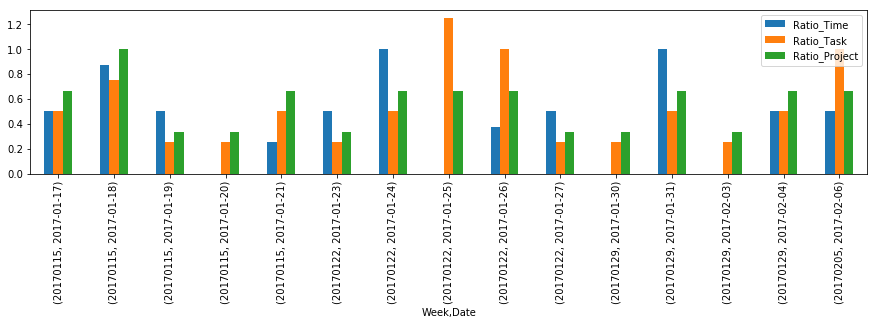

In [86]:
daily.ix[-15:,3:].plot(kind="bar", figsize=[15,3])

## Weekly Stats

In [87]:
weekly = dfs.groupby(["Week"]).agg({'Time': ['sum'], 'TXT': 'count', 'Date': 'count'})
weekly.columns = weekly.columns.map(mu.flattenCols)
weekly.rename(columns={"TXT_count": "Task_total", "Date_count": "Task_done"}, inplace=True)
weekly.fillna(0).sort_index(0, ascending=False)
weekly['Ratio_Time'] = weekly.Time_sum / 40
weekly['Ratio_Task'] = weekly.Task_done / weekly.Task_total
wstat = weekly.fillna(0).sort_index(0, ascending=False).round(2)
wstat.to_csv("rpt/weekly_stats.tsv",sep="\t")
wstat

,Time_sum,Task_total,Task_done,Ratio_Time,Ratio_Task
Week,,,,,
20170205,4.0,14,4,0.10,0.29
20170129,12.0,19,6,0.30,0.32
20170122,19.0,26,13,0.48,0.50
20170115,17.0,23,11,0.42,0.48
20170108,17.0,33,20,0.42,0.61
20170101,18.0,24,14,0.45,0.58


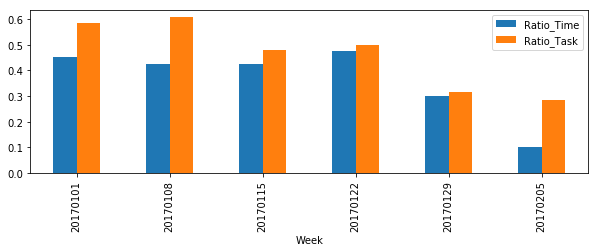

In [88]:
weekly.ix[:,3:].plot(kind="bar", figsize=[10,3])